In [1]:
import booz_xform as bx
from simsopt.geo.surfacerzfourier import SurfaceRZFourier
#iota =.25
config_name = 'template'
mboz = 48 # number of poloidal harmonics for Boozer transformation
nboz = 48 # number of toroidal harmonics for Boozer transformation

b = bx.Booz_xform()
wout_filename = 'wout_iota_10.nc'
b.read_wout(wout_filename)
b.mboz = mboz
b.nboz = nboz
b.run()
b.write_boozmn('boozmn_'+config_name+'.nc')

About to try reading VMEC wout file wout_iota_10.nc
Read ns=50, mpol=5, ntor=5, mnmax=50, mnmax_nyq=128
compute_surfs (0-based indices):  0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
Initializing with mboz=48, nboz=48
ntheta = 194, nzeta = 194, # threads = 12
                   |        outboard (theta=0)      |      inboard (theta=pi)      |
thread js_b js zeta| |B|input  |B|Boozer    Error   | |B|input  |B|Boozer    Error |
------------------------------------------------------------------------------------
   8    33  33   0  1.196e+00  1.196e+00  5.201e-15  1.469e+00  1.469e+00  6.350e-15
                pi  1.171e+00  1.171e+00  1.138e-14  1.529e+00  1.529e+00  7.841e-15
   7    29  29   0  1.206e+00  1.206e+00  1.842e-15  1.462e+00  1.462e+00  3.950e-15
                pi  1.183e+00  1.183e+00  7.133e-15  1.520e+00  1.520e+00  9.058e-15
   0     0   0   0  1.326e+00  1.326e+00  3.852e-15  

About to try reading boozmn netcdf file boozmn_template.nc
Read mboz=48, nboz=48, mnboz=4608, ns_b=49
Read compute_surfs= 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
s_b=1.020e-02
3.061e-02
5.102e-02
7.143e-02
9.184e-02
1.122e-01
1.327e-01
1.531e-01
1.735e-01
1.939e-01
2.143e-01
2.347e-01
2.551e-01
2.755e-01
2.959e-01
3.163e-01
3.367e-01
3.571e-01
3.776e-01
3.980e-01
4.184e-01
4.388e-01
4.592e-01
4.796e-01
5.000e-01
5.204e-01
5.408e-01
5.612e-01
5.816e-01
6.020e-01
6.224e-01
6.429e-01
6.633e-01
6.837e-01
7.041e-01
7.245e-01
7.449e-01
7.653e-01
7.857e-01
8.061e-01
8.265e-01
8.469e-01
8.673e-01
8.878e-01
9.082e-01
9.286e-01
9.490e-01
9.694e-01
9.898e-01
Mean QA metric:  0.013822353627717509
Mean iota:  0.08379524693472627


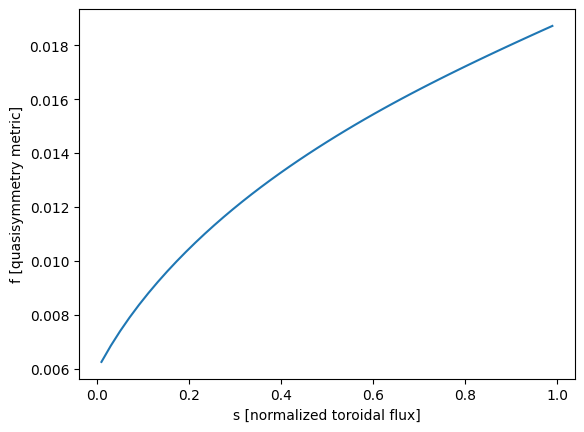

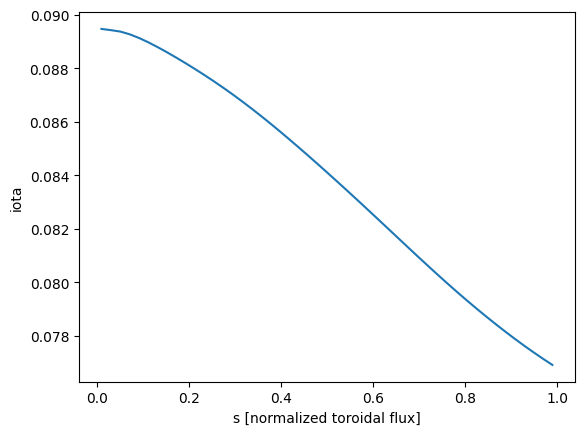

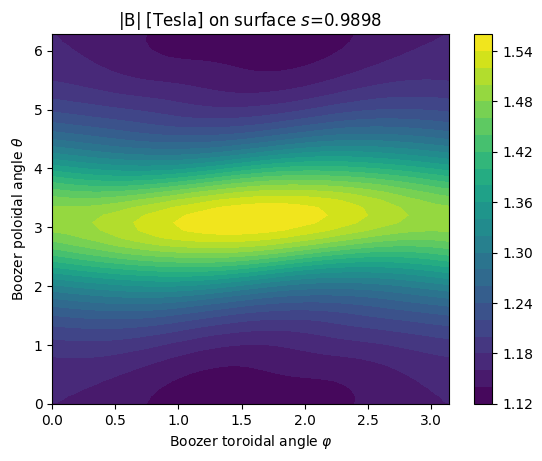

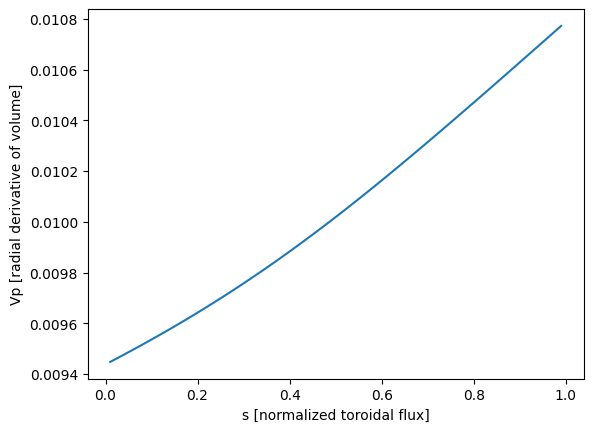

Volume:  0.39684750379066996
Aspect ratio:  7.021737509715681
Minor radius:  0.14199828760592587
Major radius:  0.997074702397925
Averaged field strength:  1.3085689062290502


In [3]:
import booz_xform as bx
import matplotlib.pyplot as plt
import numpy as np
from simsopt.mhd.vmec import Vmec 

config_name = 'template'
b = bx.Booz_xform()
b.read_boozmn('boozmn_'+config_name+'.nc')

bmnc = b.bmnc_b
xm = b.xm_b
xn = b.xn_b
f = np.sqrt(np.sum(bmnc[xn!=0,:]**2,axis=0)/np.sum(bmnc**2,axis=0))
print('Mean QA metric: ',np.mean(f))
print('Mean iota: ',np.mean(b.iota))
s = b.s_b

plt.figure()
plt.plot(s,f)
plt.xlabel('s [normalized toroidal flux]')
plt.ylabel('f [quasisymmetry metric]')
plt.savefig('fqs_plot.png')

plt.figure()
plt.plot(s,b.iota)
plt.xlabel('s [normalized toroidal flux]')
plt.ylabel('iota')
plt.savefig('iota.png')

plt.figure()
bx.surfplot(b, js=-1)
plt.savefig('modB_plot.png')

vmec = Vmec('wout_iota_10.nc');
plt.figure()
plt.plot(vmec.s_half_grid,vmec.wout.vp[1::])
plt.xlabel('s [normalized toroidal flux]')
plt.ylabel('Vp [radial derivative of volume]')
plt.savefig('magwell.png')
plt.show()

print('Volume: ', vmec.wout.volume_p)
print('Aspect ratio: ',vmec.wout.aspect)
print('Minor radius: ',vmec.wout.Aminor_p)
print('Major radius: ',vmec.wout.Rmajor_p)
print('Averaged field strength: ',vmec.wout.volavgB)

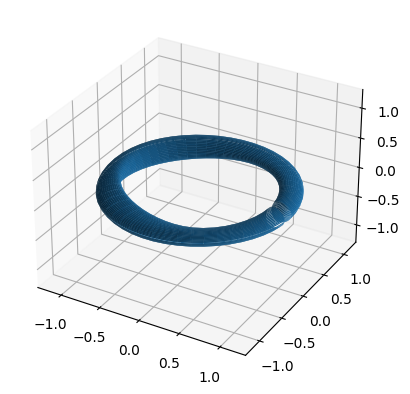

<Axes3D: >

In [3]:
vmec.boundary.plot()

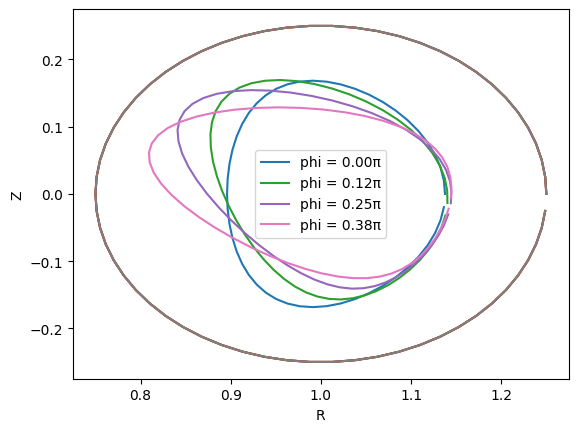

In [4]:
HBT_R0 = 1.0
HBT_a = 0.25
VV = SurfaceRZFourier()
VV.set_rc(0,0,HBT_R0)
VV.set_rc(1,0,HBT_a)
VV.set_zs(1,0,HBT_a)

plt.figure()
for phi in [0,0.25*2*np.pi/4,0.5*2*np.pi/4,0.75*2*np.pi/4]:
    cs = vmec.boundary.cross_section(phi)
    r = np.sqrt(cs[:,0]**2 + cs[:,1]**2)
    cs2 = VV.cross_section(phi)
    r2 = np.sqrt(cs2[:,0]**2 + cs2[:,1]**2)
    plt.plot(r, cs[:,2], label=f'phi = {phi / np.pi:.2f}π')
    plt.plot(r2, cs2[:,2])

plt.xlabel('R')
plt.ylabel('Z')
plt.legend()

In [5]:
from simsopt.geo import CurveSurfaceDistance, curves_to_vtk, create_equally_spaced_curves
from simsopt.field import Current, coils_via_symmetries
surf = vmec.boundary

base_curves = create_equally_spaced_curves(10, vmec.boundary.nfp, stellsym=True, R0=1, R1=.25, order=2, numquadpoints=61)
coils = coils_via_symmetries(base_curves, [Current(1e5) for i in range(10)], vmec.boundary.nfp, True)
Jcsdist = CurveSurfaceDistance(base_curves, vmec.boundary, 2e-2)
Jcsdist.shortest_distance()

0.04915175855701768